# 1. Dataset Information

### Informações do conjunto de dados

Contém as respostas de um dispositivo multissensor de gás implantado em campo em uma cidade italiana. As médias de respostas horárias são registradas junto com referências de concentrações de gás de um analisador certificado.

Informações adicionais

O conjunto de dados contém 9358 instâncias de respostas médias horárias de uma matriz de 5 sensores químicos de óxido de metal incorporados em um dispositivo multissensor químico de qualidade do ar. O dispositivo estava localizado no campo em uma área significativamente poluída, no nível da estrada, dentro de uma cidade italiana. Os dados foram registrados de março de 2004 a fevereiro de 2005 (um ano), representando as gravações mais longas disponíveis gratuitamente de respostas de dispositivos de sensores químicos de qualidade do ar implantados em campo. Concentrações médias horárias do Ground Truth para CO, hidrocarbonetos não metânicos, benzeno, óxidos de nitrogênio totais (NOx) e dióxido de nitrogênio (NO2) e foram fornecidas por um analisador certificado de referência co-localizado. Evidências de sensibilidades cruzadas, bem como desvios de conceito e sensor estão presentes, conforme descrito em De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citação necessária), eventualmente afetando as capacidades de estimativa de concentração dos sensores. Valores ausentes são marcados com valor -200.

# 2. Bibliotecas

In [2]:
print(pd.__version__)

1.5.0


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb

from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest


from sklearn.feature_selection import f_regression


from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor


In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

## 3. Variáveis do Dataset

In [6]:
air_quality.variables.drop(columns= ['role', 'type', 'demographic', 'missing_values'])

air_quality.variables

#Para fins de informação, "hourly averaged sensor response" e "True hourly averaged" é uma agregação em média do parametro coletado ao longo de uma hora.

name     role         type demographic  \
0            Date  Feature         Date        None   
1            Time  Feature  Categorical        None   
2          CO(GT)  Feature      Integer        None   
3     PT08.S1(CO)  Feature  Categorical        None   
4        NMHC(GT)  Feature      Integer        None   
5        C6H6(GT)  Feature   Continuous        None   
6   PT08.S2(NMHC)  Feature  Categorical        None   
7         NOx(GT)  Feature      Integer        None   
8    PT08.S3(NOx)  Feature  Categorical        None   
9         NO2(GT)  Feature      Integer        None   
10   PT08.S4(NO2)  Feature  Categorical        None   
11    PT08.S5(O3)  Feature  Categorical        None   
12              T  Feature   Continuous        None   
13             RH  Feature   Continuous        None   
14             AH  Feature   Continuous        None   

                                          description       units  \
0                                                None        None   
1                                                None        None   
2   True hourly averaged concentration CO in mg/m^...      mg/m^3   
3   hourly averaged sensor response (nominally  CO...        None   
4   True hourly averaged overall Non Metanic Hydro...  microg/m^3   
5   True hourly averaged Benzene concentration  in...  microg/m^3   
6   hourly averaged sensor response (nominally NMH...        None   
7   True hourly averaged NOx concentration  in ppb...         ppb   
8   hourly averaged sensor response (nominally NOx...        None   
9   True hourly averaged NO2 concentration in micr...  microg/m^3   
10  hourly averaged sensor response (nominally NO2...        None   
11  hourly averaged sensor response (nominally O3 ...        None   
12                                        Temperature          °C   
13                                  Relative Humidity           %   
14                                  Absolute Humidity        None   

   missing_values  
0              no  
1              no  
2              no  
3              no  
4              no  
5              no  
6              no  
7              no  
8              no  
9              no  
10             no  
11             no  
12             no  
13             no  
14             no

CO = O monóxido de carbono (CO) é um gás levemente inflamável, inodoro e muito perigoso devido à sua grande toxicidade. É produzido pela queima em condições de pouco oxigênio (combustão incompleta) e/ou alta temperatura de carvão ou outros materiais ricos em carbono, como derivados de petróleo, por exemplo, pelos motores dos veículos.

NMHC = Os hidrocarbonetos não metânicos (HCNM) ou hidrocarbonetos não metano são compostos muito reativos que interferem no ciclo global do carbono, na concentração desse elemento na atmosfera e na capacidade de oxidação dela.Esses compostos são produzidos principalmente por meio do metabolismo secundário das folhas.A emissão dos 8% restantes de HCNM é proveniente de atividades humanas, como da produção de energia, dos automóveis e das indústrias, pois esses gases são produzidos na combustão incompleta dos combustíveis, como a gasolina, o gás natural e o GLP (Gás Liquefeito de Petróleo).

C6H6 = O benzeno ou C6H6 é um líquido incolor, altamente inflamável e com odor adocicado. É utilizado na produção de plásticos, fibras sintéticas, borracha, pesticidas e outros produtos químicos. É um conhecido agente cancerígeno e pode causar problemas de saúde.

NO2 = O dióxido de nitrogênio (NO2) é um dos gases altamente reativos conhecidos como óxidos de nitrogênio (NOx). As principais fontes de emissões antropogênicas de NO2 são os processos de combustão. Respirar ar com alta concentração de NO2 pode irritar as vias aéreas no sistema respiratório humano.

O3 = Poluição por ozônio é um tipo de poluição causado a partir de reações químicas entre raios solares, gases presentes na atmosfera e compostos liberados por veículos, processos industriais e instalações como usinas de energia e aterros sanitários. Apesar desse gás ser extremamente necessário para bloquear parte da radiação solar que chega à superfície terrestre, o ozônio formado na troposfera a partir de reações químicas com outros poluentes causa diversos danos à saúde humana e ao meio ambiente.

T = A temperatura ambiente é um parâmetro básico que influencia a dispersão de poluentes e a formação de ozônio troposférico. Altas temperaturas podem aumentar as reações químicas que geram ozônio.

RH = É a relação entre a umidade absoluta do ar e o seu ponto de saturação (é o limite pelo qual a atmosfera pode aumentar a quantidade de vapor d’água. Quando este é atingido, dizemos que o ar está saturado; quanto maior a temperatura, maior a quantidade de vapor de água que o ar poderá conter, e, consequentemente, maior será o ponto de saturação). A umidade relativa afeta a formação de nevoeiros e a dispersão de poluentes. Alta umidade pode reduzir a dispersão de certos poluentes, exacerbando a poluição local.

AH = É a quantidade de vapor de água existente na atmosfera num dado momento. A AH influencia a formação de nevoeiros, chuvas e a dispersão de poluentes. Em climas úmidos, pode haver maior retenção de certos poluentes no ar.

Em suma, a variação para cima ou para baixo de alguns desses compostos indicam a interferência de atividades humanas industriais que afetam diretamente na saúde pública.

## 4. Objetivo do Estudo: Desenvolver um modelo preditivo que seja capaz de prever a qualidade do ar com base em dados meterológicos e de poluição.

## 5. Tratando os dados

In [8]:
# data (as pandas dataframes)
X = air_quality.data.features
X.tail()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9352  4/4/2005  10:00:00     3.1         1314      -200      13.5   
9353  4/4/2005  11:00:00     2.4         1163      -200      11.4   
9354  4/4/2005  12:00:00     2.4         1142      -200      12.4   
9355  4/4/2005  13:00:00     2.1         1003      -200       9.5   
9356  4/4/2005  14:00:00     2.2         1071      -200      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352           1101      472           539      190          1374   
9353           1027      353           604      179          1264   
9354           1063      293           603      175          1241   
9355            961      235           702      156          1041   
9356           1047      265           654      168          1129   

      PT08.S5(O3)     T    RH      AH  
9352         1729  21.9  29.3  0.7568  
9353         1269  24.3  23.7  0.7119  
9354         1092  26.9  18.3  0.6406  
9355          770  28.3  13.5  0.5139  
9356          816  28.5  13.1  0.5028

In [9]:
X['Date'] = pd.to_datetime(X['Date'].str.strip(), format='%m/%d/%Y')

In [10]:
X['day'] = X['Date'].dt.day
X['month'] = X['Date'].dt.month
X['year'] = X['Date'].dt.year

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   int64         
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   int64         
 7   NOx(GT)        9357 non-null   int64         
 8   PT08.S3(NOx)   9357 non-null   int64         
 9   NO2(GT)        9357 non-null   int64         
 10  PT08.S4(NO2)   9357 non-null   int64         
 11  PT08.S5(O3)    9357 non-null   int64         
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  day            9357 n

In [12]:
X['month'] = X['month'].astype(str)
X['year'] = X['year'].astype(str)


In [13]:
X['Month_year'] = X['month'] + '/' + X['year']

In [14]:
X.reset_index().astype(str)


index        Date      Time CO(GT) PT08.S1(CO) NMHC(GT) C6H6(GT)  \
0        0  2004-03-10  18:00:00    2.6        1360      150     11.9   
1        1  2004-03-10  19:00:00    2.0        1292      112      9.4   
2        2  2004-03-10  20:00:00    2.2        1402       88      9.0   
3        3  2004-03-10  21:00:00    2.2        1376       80      9.2   
4        4  2004-03-10  22:00:00    1.6        1272       51      6.5   
...    ...         ...       ...    ...         ...      ...      ...   
9352  9352  2005-04-04  10:00:00    3.1        1314     -200     13.5   
9353  9353  2005-04-04  11:00:00    2.4        1163     -200     11.4   
9354  9354  2005-04-04  12:00:00    2.4        1142     -200     12.4   
9355  9355  2005-04-04  13:00:00    2.1        1003     -200      9.5   
9356  9356  2005-04-04  14:00:00    2.2        1071     -200     11.9   

     PT08.S2(NMHC) NOx(GT) PT08.S3(NOx) NO2(GT) PT08.S4(NO2) PT08.S5(O3)  \
0             1046     166         1056     113         1692        1268   
1              955     103         1174      92         1559         972   
2              939     131         1140     114         1555        1074   
3              948     172         1092     122         1584        1203   
4              836     131         1205     116         1490        1110   
...            ...     ...          ...     ...          ...         ...   
9352          1101     472          539     190         1374        1729   
9353          1027     353          604     179         1264        1269   
9354          1063     293          603     175         1241        1092   
9355           961     235          702     156         1041         770   
9356          1047     265          654     168         1129         816   

         T    RH      AH day month  year Month_year  
0     13.6  48.9  0.7578  10     3  2004     3/2004  
1     13.3  47.7  0.7255  10     3  2004     3/2004  
2     11.9  54.0  0.7502  10     3  2004     3/2004  
3     11.0  60.0  0.7867  10     3  2004     3/2004  
4     11.2  59.6  0.7888  10     3  2004     3/2004  
...    ...   ...     ...  ..   ...   ...        ...  
9352  21.9  29.3  0.7568   4     4  2005     4/2005  
9353  24.3  23.7  0.7119   4     4  2005     4/2005  
9354  26.9  18.3  0.6406   4     4  2005     4/2005  
9355  28.3  13.5  0.5139   4     4  2005     4/2005  
9356  28.5  13.1  0.5028   4     4  2005     4/2005  

[9357 rows x 20 columns]

## 6. EDA - Análise Exploratória dos Dados

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   int64         
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   int64         
 7   NOx(GT)        9357 non-null   int64         
 8   PT08.S3(NOx)   9357 non-null   int64         
 9   NO2(GT)        9357 non-null   int64         
 10  PT08.S4(NO2)   9357 non-null   int64         
 11  PT08.S5(O3)    9357 non-null   int64         
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  day            9357 n

In [16]:
y = air_quality.data.targets
print(y)

None


In [17]:
X.isnull().sum()
#Não há valores null no dataset

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
day              0
month            0
year             0
Month_year       0
dtype: int64

In [18]:
Xnumber = X.drop(columns=['Date', 'Time', 'day', 'month', 'year', 'Month_year'])


In [19]:
X.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH          day  
count  9357.000000  9357.000000  9357.000000  9357.000000  
mean      9.778305    39.485380    -6.837604    15.876884  
std      43.203623    51.216145    38.976670     8.808653  
min    -200.000000  -200.000000  -200.000000     1.000000  
25%      10.900000    34.100000     0.692300     8.000000  
50%      17.200000    48.600000     0.976800    16.000000  
75%      24.100000    61.900000     1.296200    23.000000  
max      44.600000    88.700000     2.231000    31.000000

In [20]:
X.duplicated().sum()

0

Não há valores duplicados no dataset

In [21]:
numericas = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']
categoricas = ['Month_year', 'month', 'year']

In [22]:
X

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18:00:00     2.6         1360       150      11.9   
1    2004-03-10  19:00:00     2.0         1292       112       9.4   
2    2004-03-10  20:00:00     2.2         1402        88       9.0   
3    2004-03-10  21:00:00     2.2         1376        80       9.2   
4    2004-03-10  22:00:00     1.6         1272        51       6.5   
...         ...       ...     ...          ...       ...       ...   
9352 2005-04-04  10:00:00     3.1         1314      -200      13.5   
9353 2005-04-04  11:00:00     2.4         1163      -200      11.4   
9354 2005-04-04  12:00:00     2.4         1142      -200      12.4   
9355 2005-04-04  13:00:00     2.1         1003      -200       9.5   
9356 2005-04-04  14:00:00     2.2         1071      -200      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056      113          1692   
1               955      103          1174       92          1559   
2               939      131          1140      114          1555   
3               948      172          1092      122          1584   
4               836      131          1205      116          1490   
...             ...      ...           ...      ...           ...   
9352           1101      472           539      190          1374   
9353           1027      353           604      179          1264   
9354           1063      293           603      175          1241   
9355            961      235           702      156          1041   
9356           1047      265           654      168          1129   

      PT08.S5(O3)     T    RH      AH  day month  year Month_year  
0            1268  13.6  48.9  0.7578   10     3  2004     3/2004  
1             972  13.3  47.7  0.7255   10     3  2004     3/2004  
2            1074  11.9  54.0  0.7502   10     3  2004     3/2004  
3            1203  11.0  60.0  0.7867   10     3  2004     3/2004  
4            1110  11.2  59.6  0.7888   10     3  2004     3/2004  
...           ...   ...   ...     ...  ...   ...   ...        ...  
9352         1729  21.9  29.3  0.7568    4     4  2005     4/2005  
9353         1269  24.3  23.7  0.7119    4     4  2005     4/2005  
9354         1092  26.9  18.3  0.6406    4     4  2005     4/2005  
9355          770  28.3  13.5  0.5139    4     4  2005     4/2005  
9356          816  28.5  13.1  0.5028    4     4  2005     4/2005  

[9357 rows x 19 columns]

C:\Users\Elaine\AppData\Local\Temp\ipykernel_7408\4056289585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Month_year", data=X, palette="pastel")


<module 'matplotlib.pyplot' from 'C:\\Users\\Elaine\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

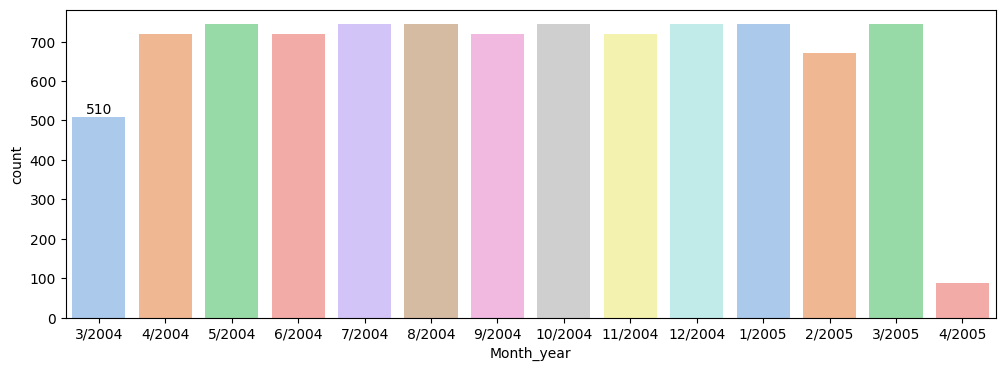

In [23]:
plt.figure(figsize=(12, 4))

ax = sns.countplot(x="Month_year", data=X, palette="pastel")
ax.bar_label(ax.containers[0], fontsize=10)


plt


A coleta de dados parece seguir um padrão em quantidade para grande parte dos meses coletados, com exceção dos meses 03/2004 e 04/2005.

In [25]:
Xnumber.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6         1360       150      11.9           1046      166   
1     2.0         1292       112       9.4            955      103   
2     2.2         1402        88       9.0            939      131   
3     2.2         1376        80       9.2            948      172   
4     1.6         1272        51       6.5            836      131   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0          1056      113          1692         1268  13.6  48.9  0.7578  
1          1174       92          1559          972  13.3  47.7  0.7255  
2          1140      114          1555         1074  11.9  54.0  0.7502  
3          1092      122          1584         1203  11.0  60.0  0.7867  
4          1205      116          1490         1110  11.2  59.6  0.7888

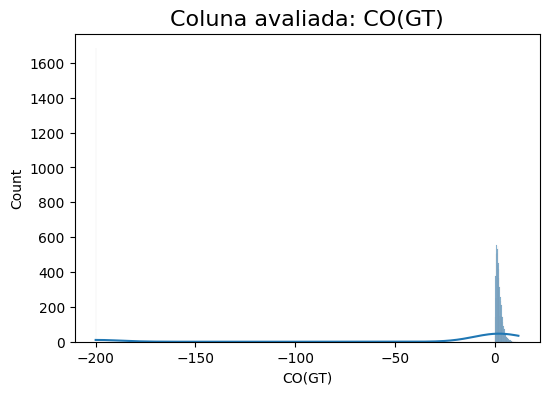

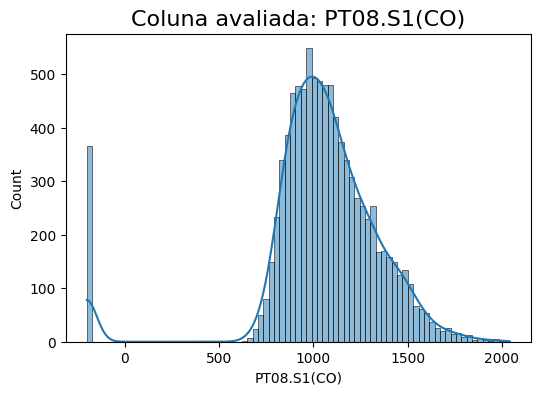

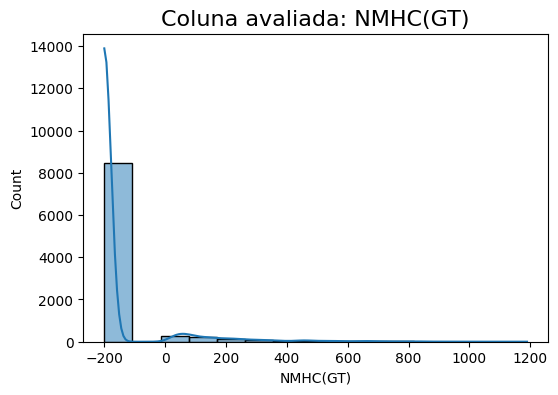

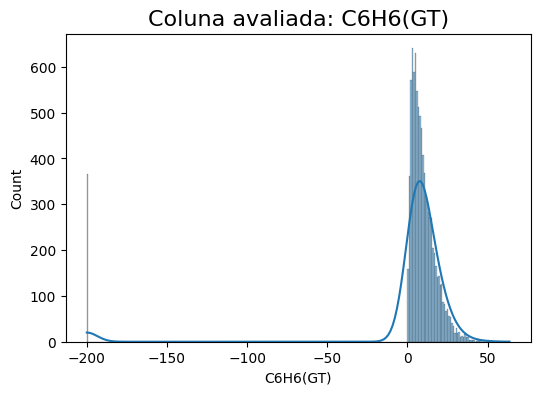

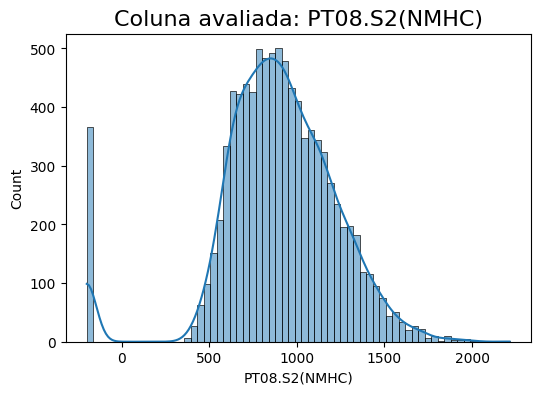

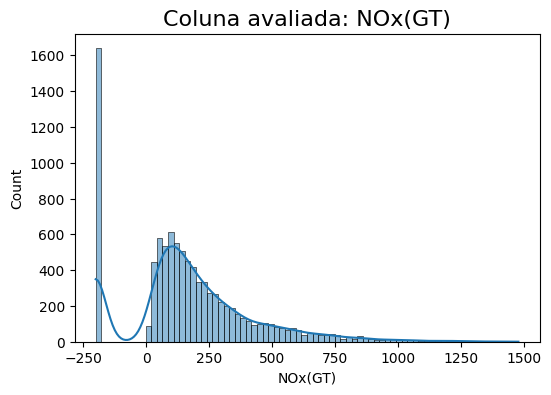

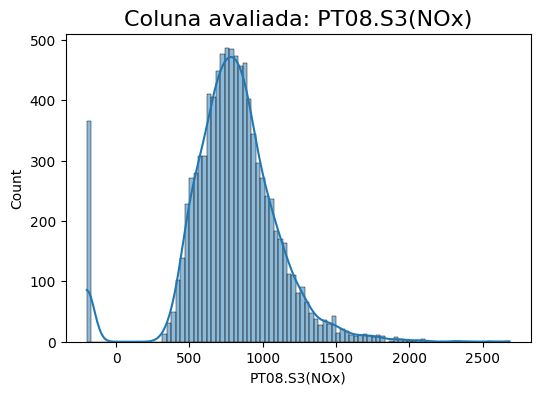

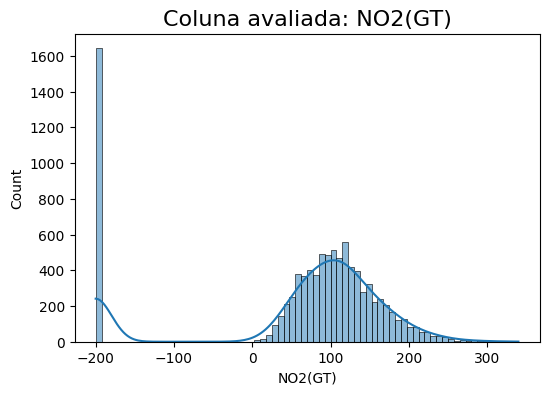

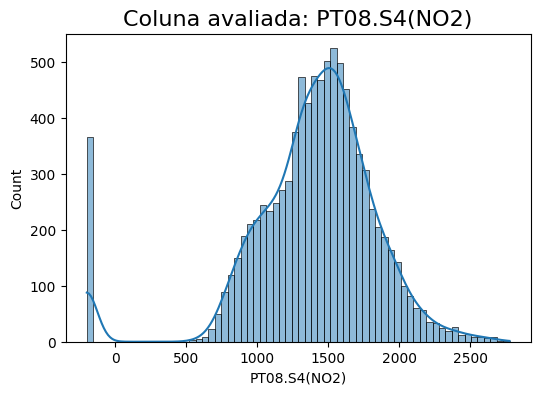

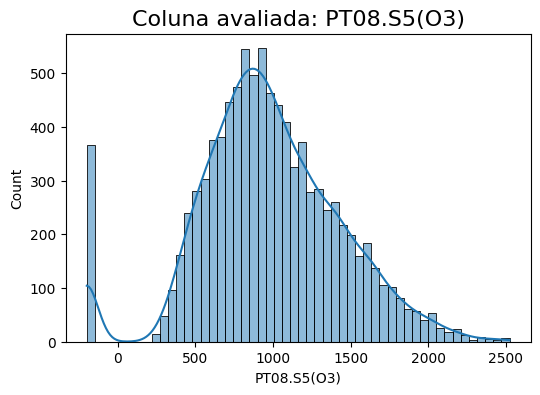

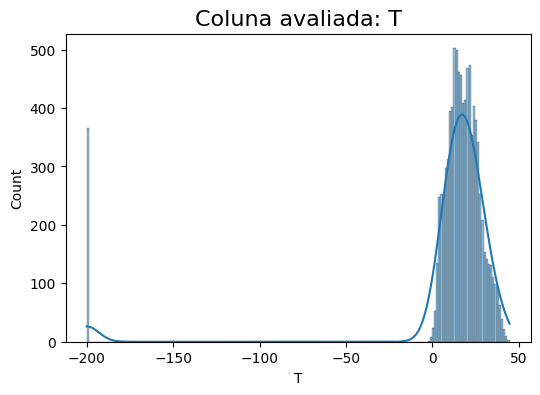

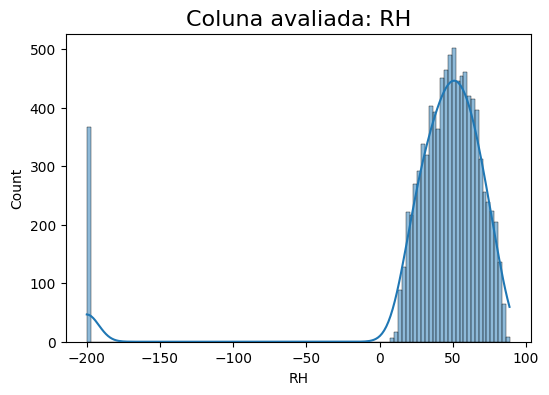

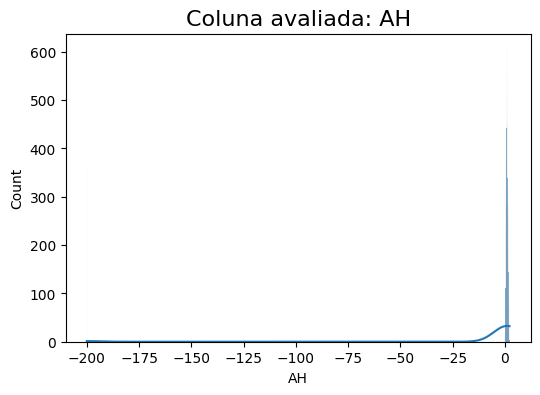

In [53]:
for c in Xnumber.columns:
    plt.figure(figsize = (6,4))
    plt.title(f"Coluna avaliada: {c}", fontsize = 16)
    
    if c in numericas:
      sns.histplot(Xnumber[c], kde = True)

Vemos que há um outlier padrão para todas as variaveis presentes no Dataset. Isso pode ser um erro no Dataset ou somente uma informação fora do padrão mesmo. É importante analisar esse caso a parte para entender.

<Axes: >

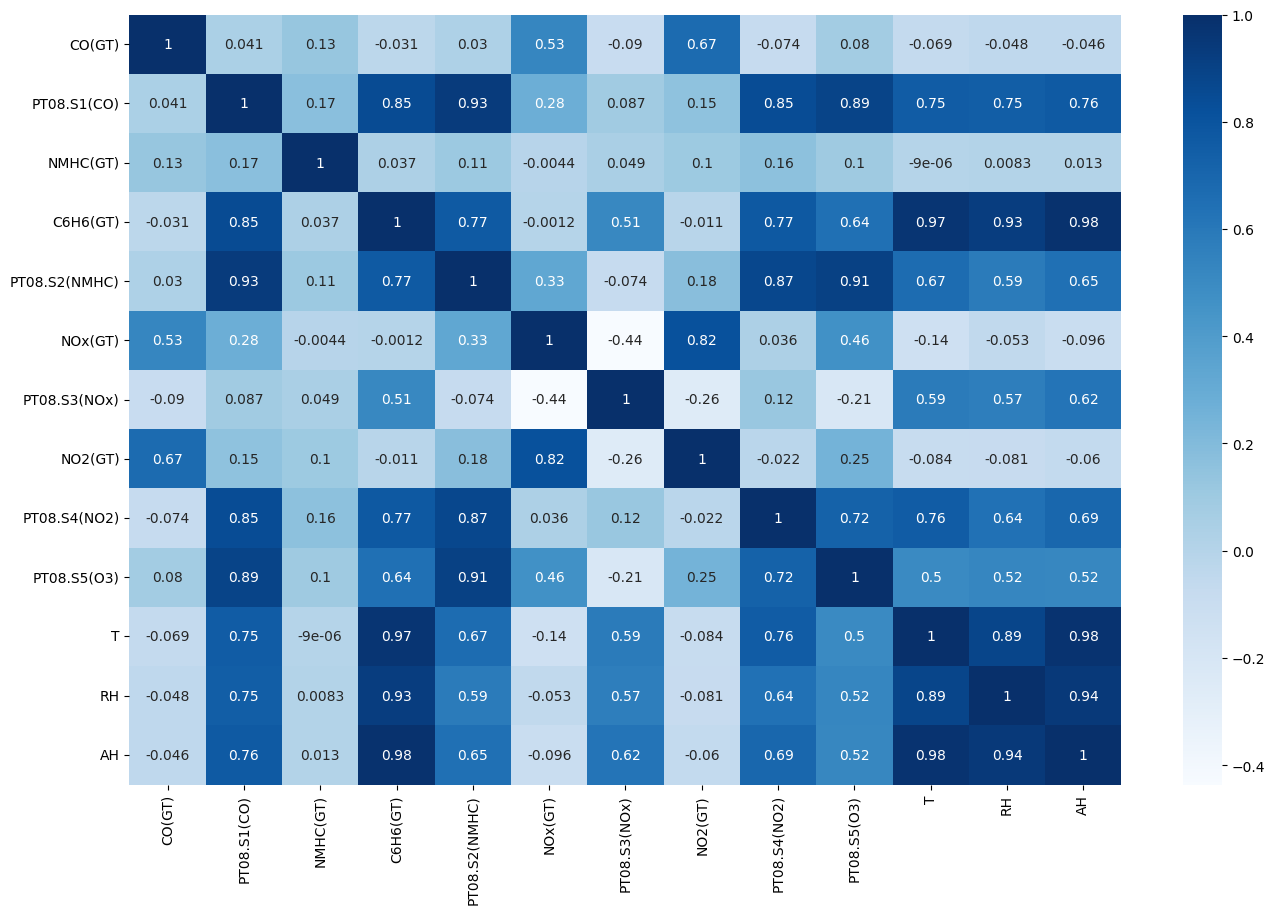

In [28]:
plt.figure(figsize= (16,10))
sns.heatmap(Xnumber.corr(), annot = True, cmap = "Blues")

<Axes: >

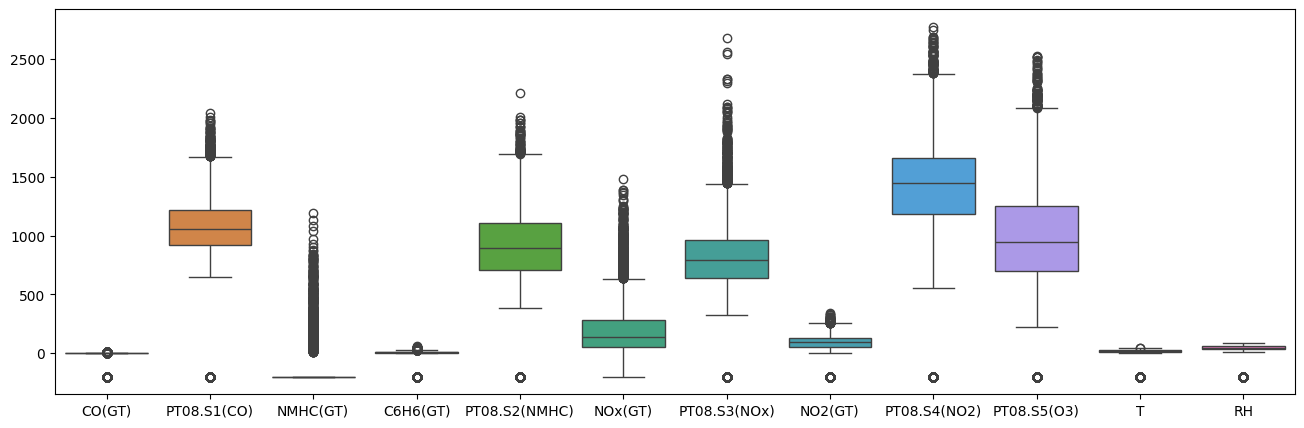

In [52]:
plt.figure(figsize = (16,5))
sns.boxplot (data = X)


Parece haver bastantes outliers. Podemos verificar também se há algum padrão dependendo do horario e mês ou se eles seguem sem um padrão.

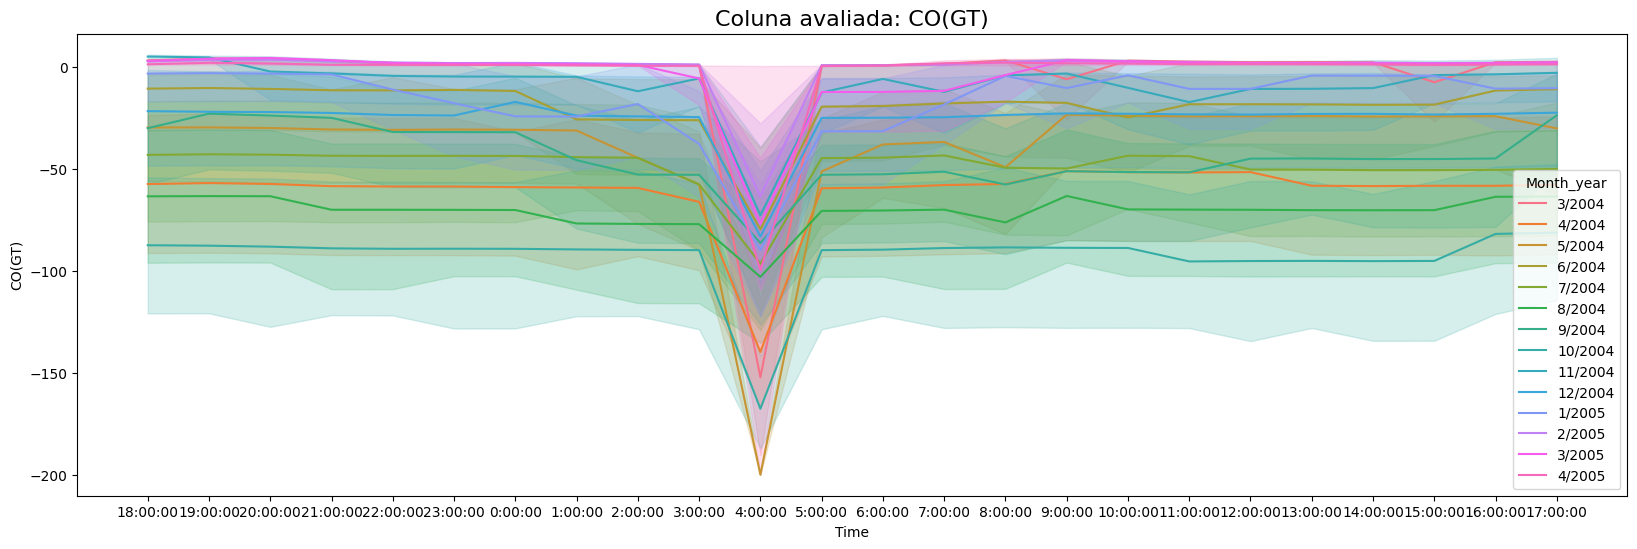

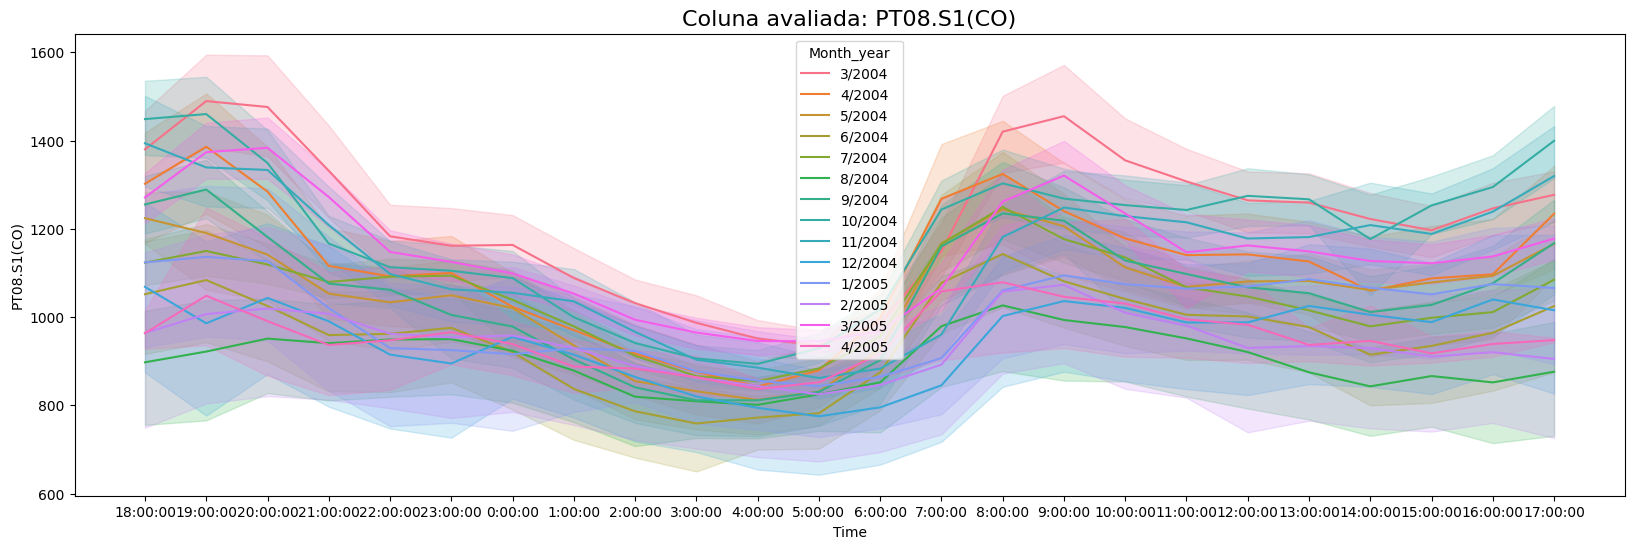

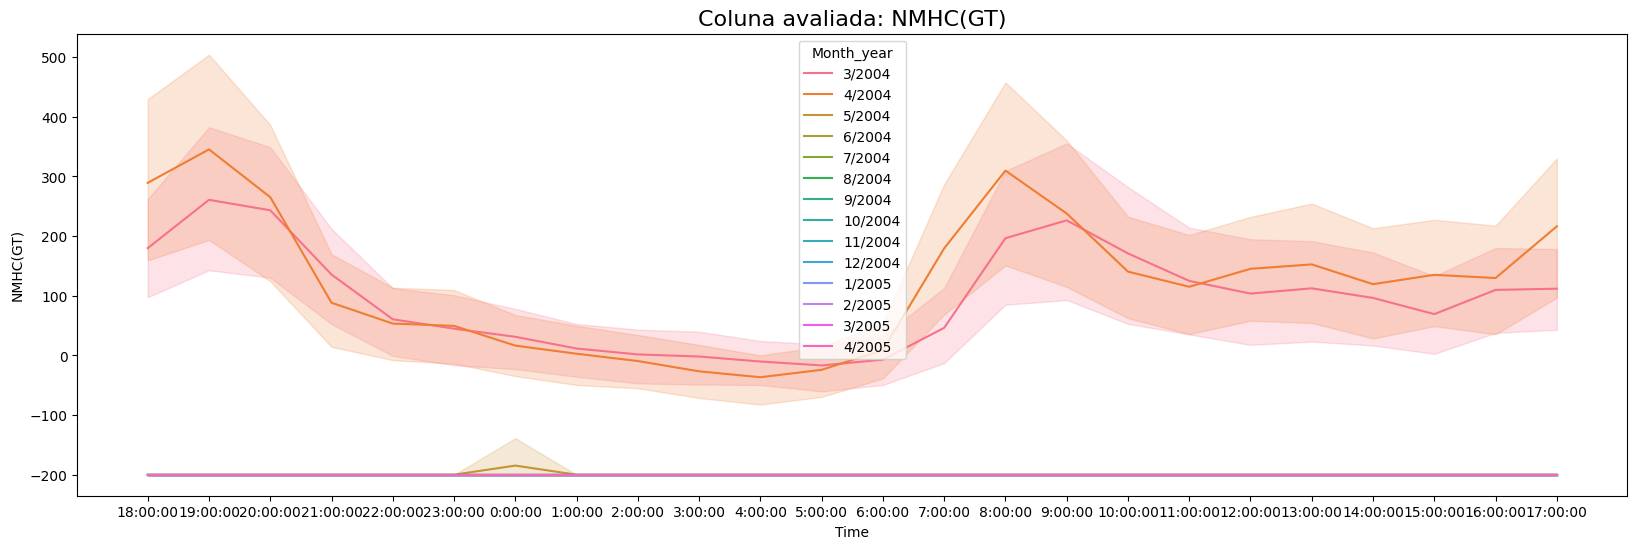

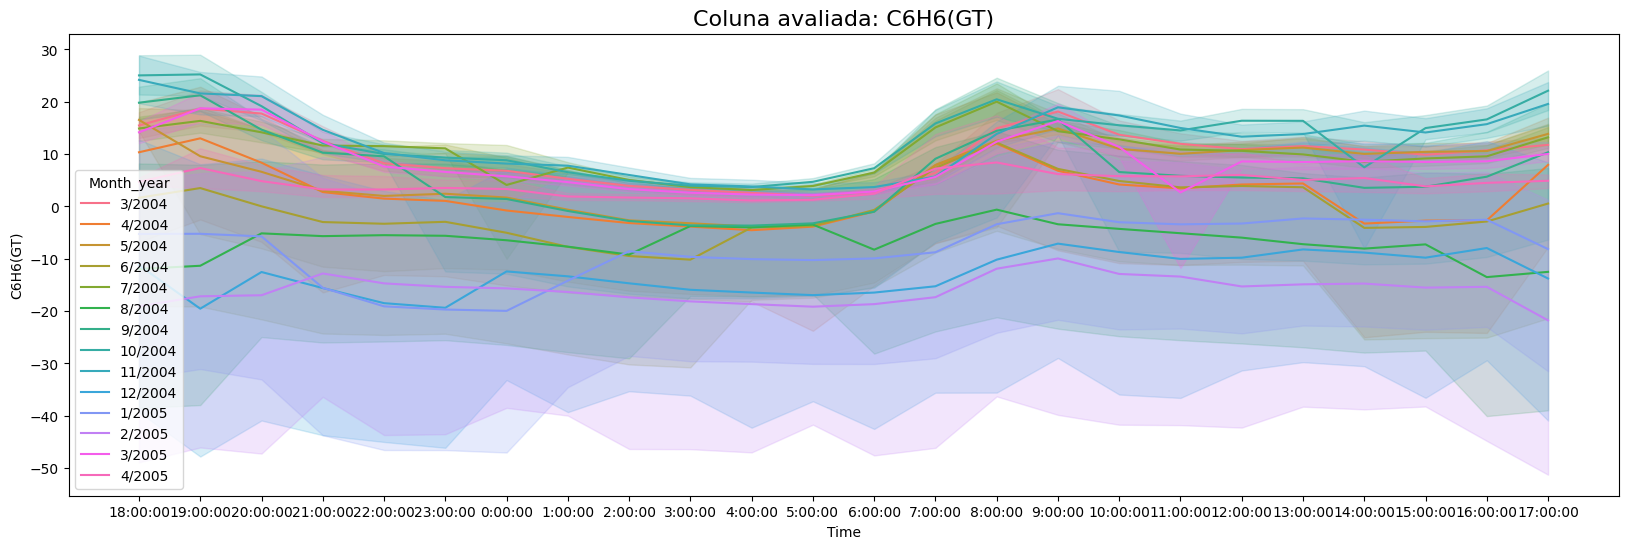

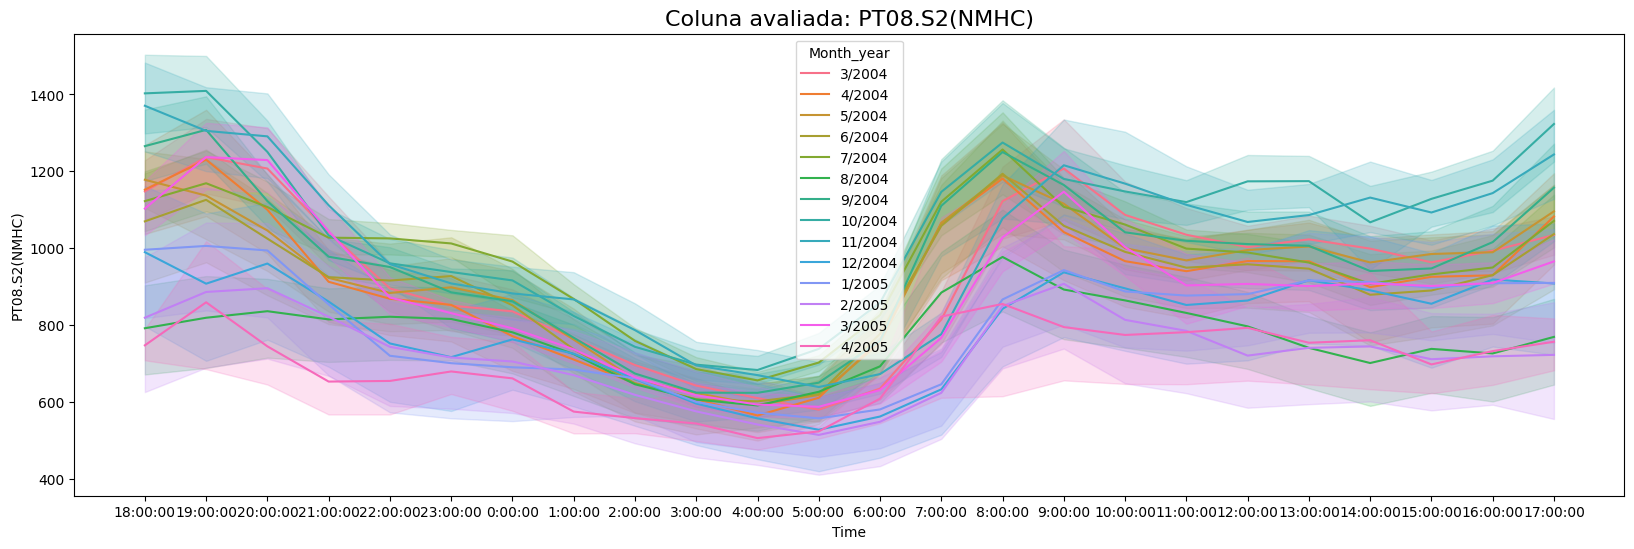

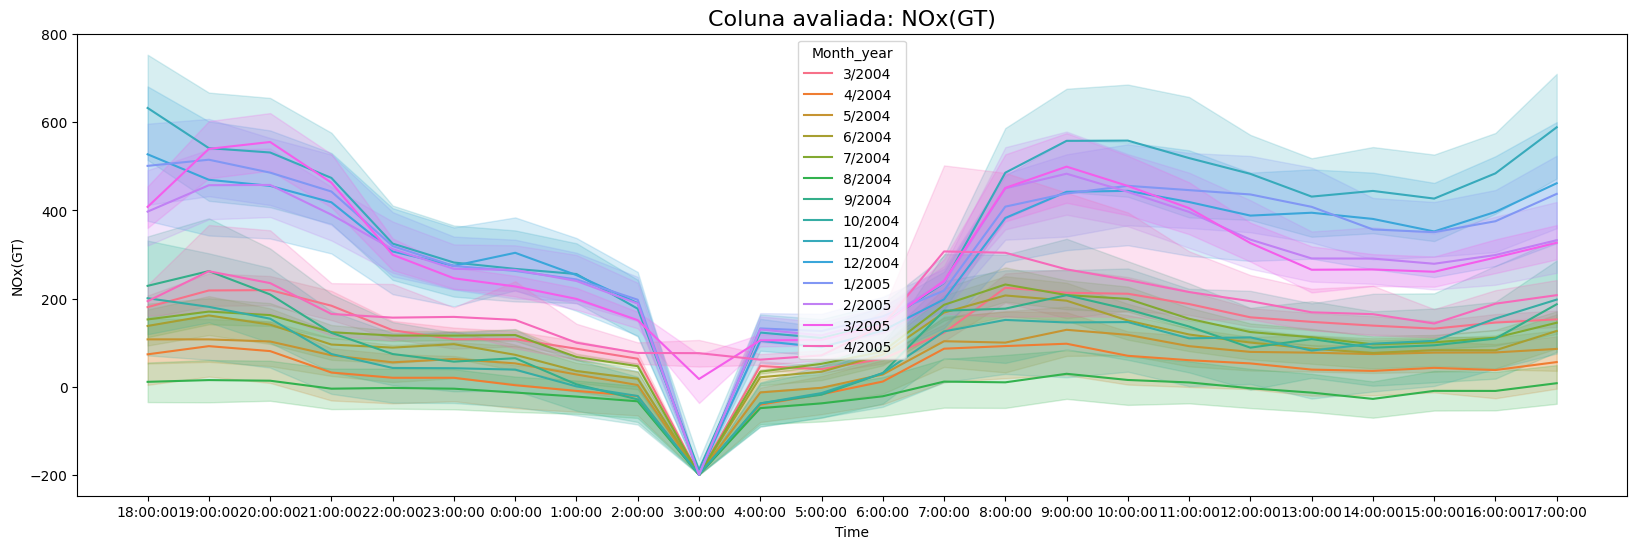

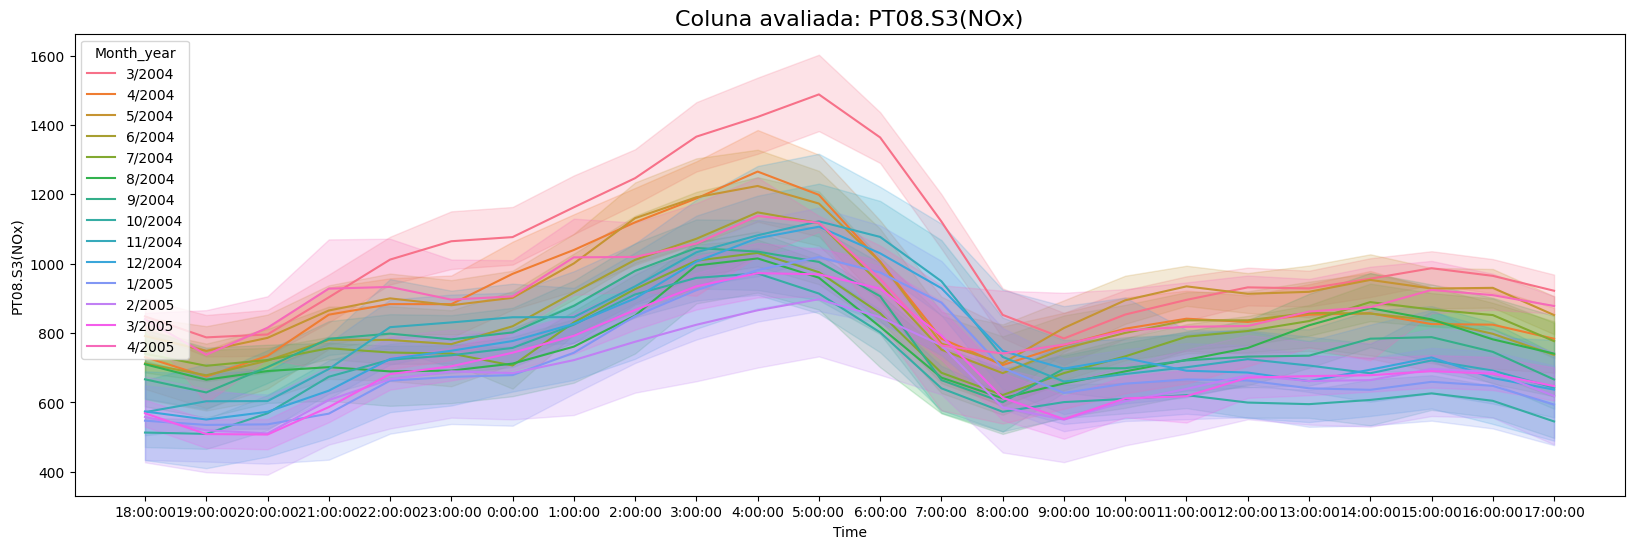

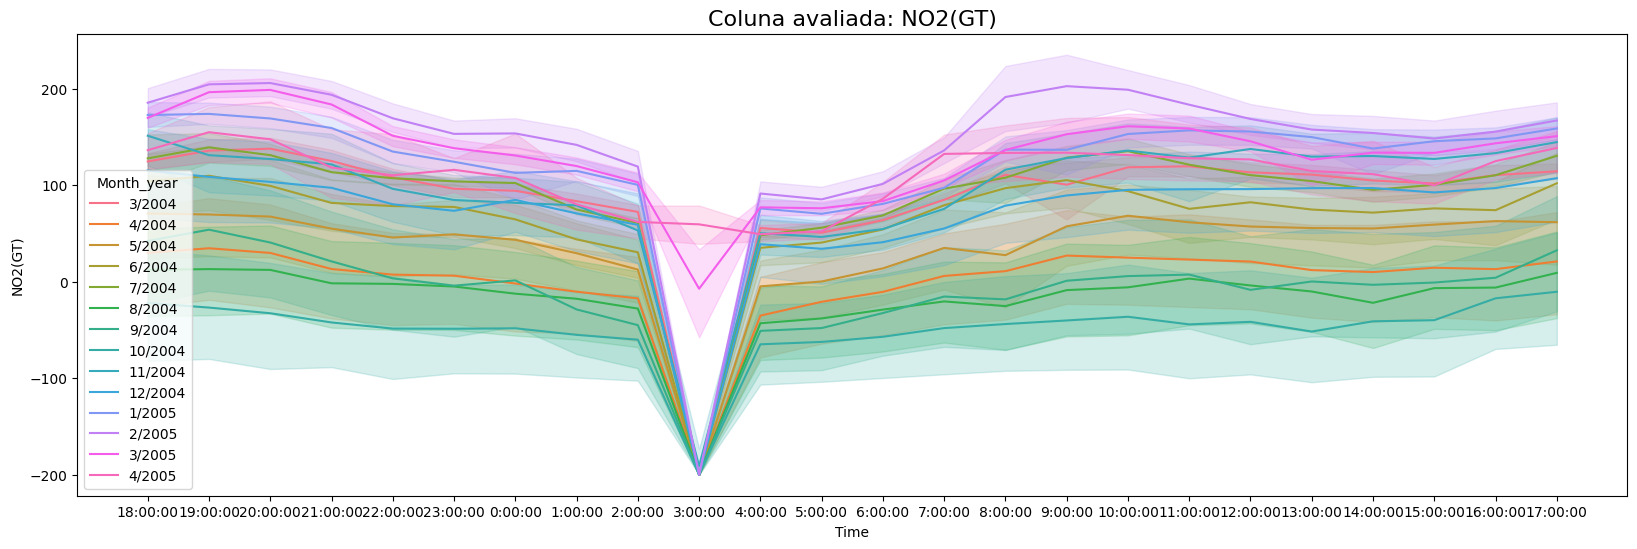

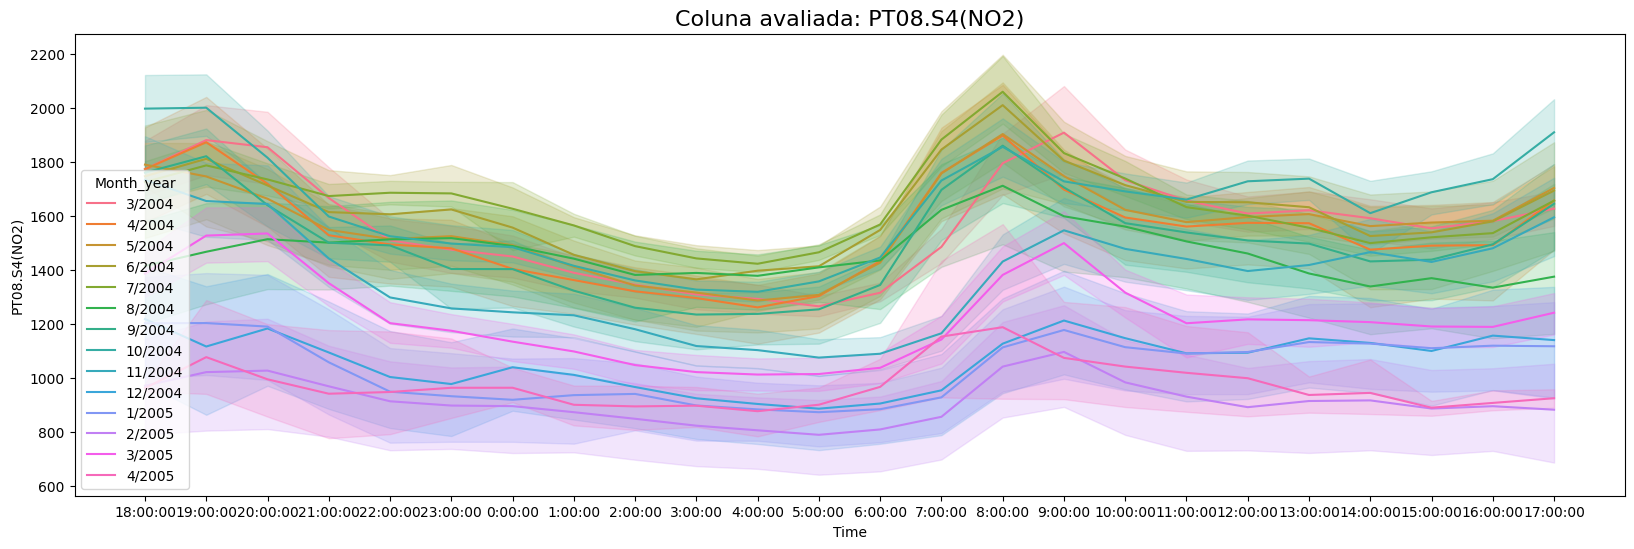

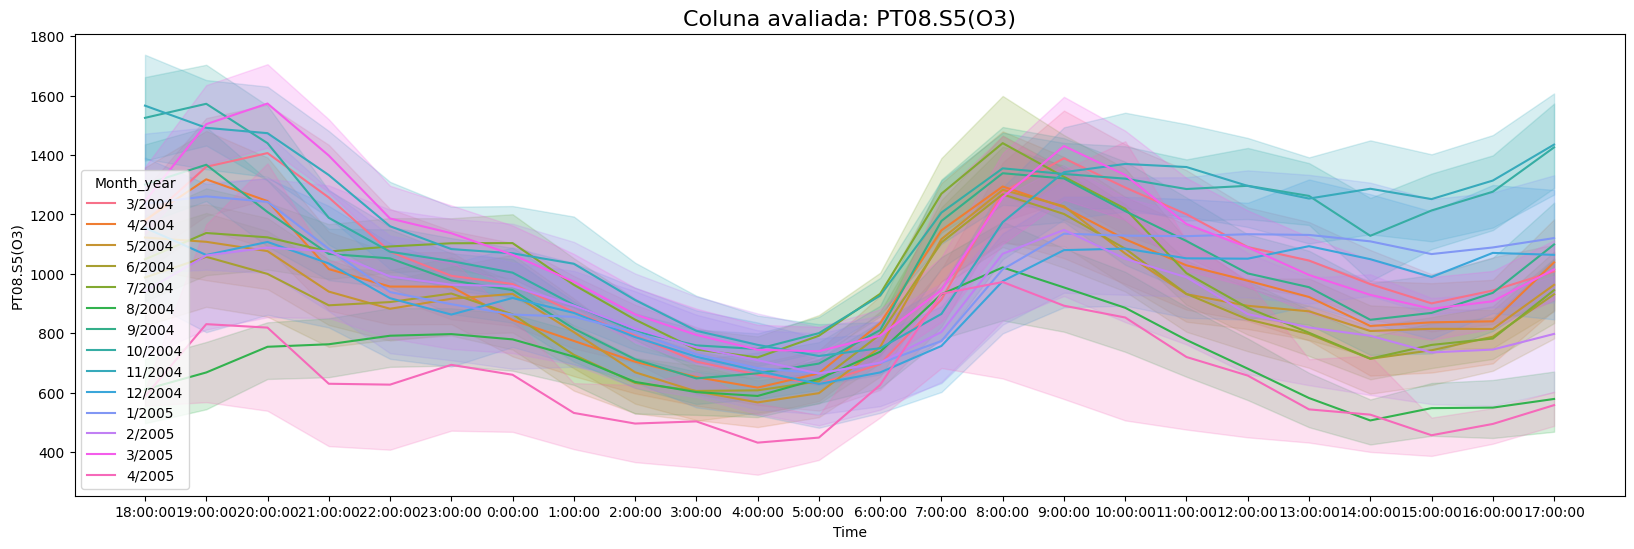

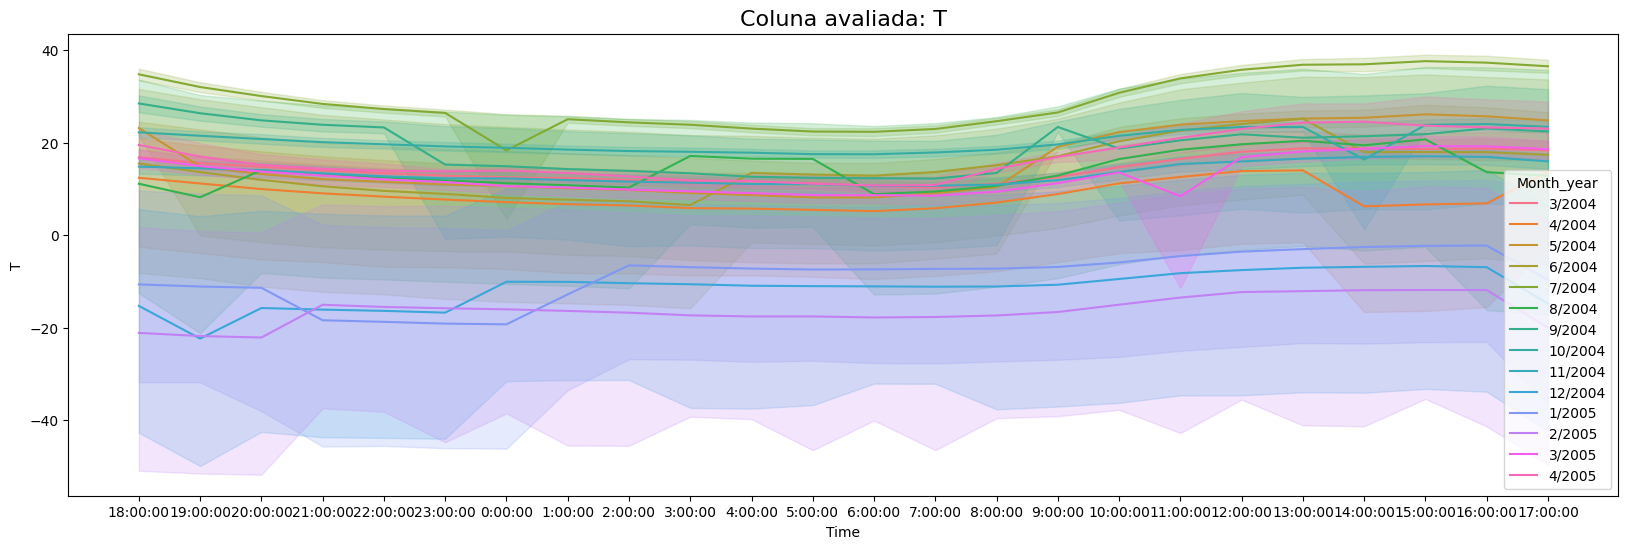

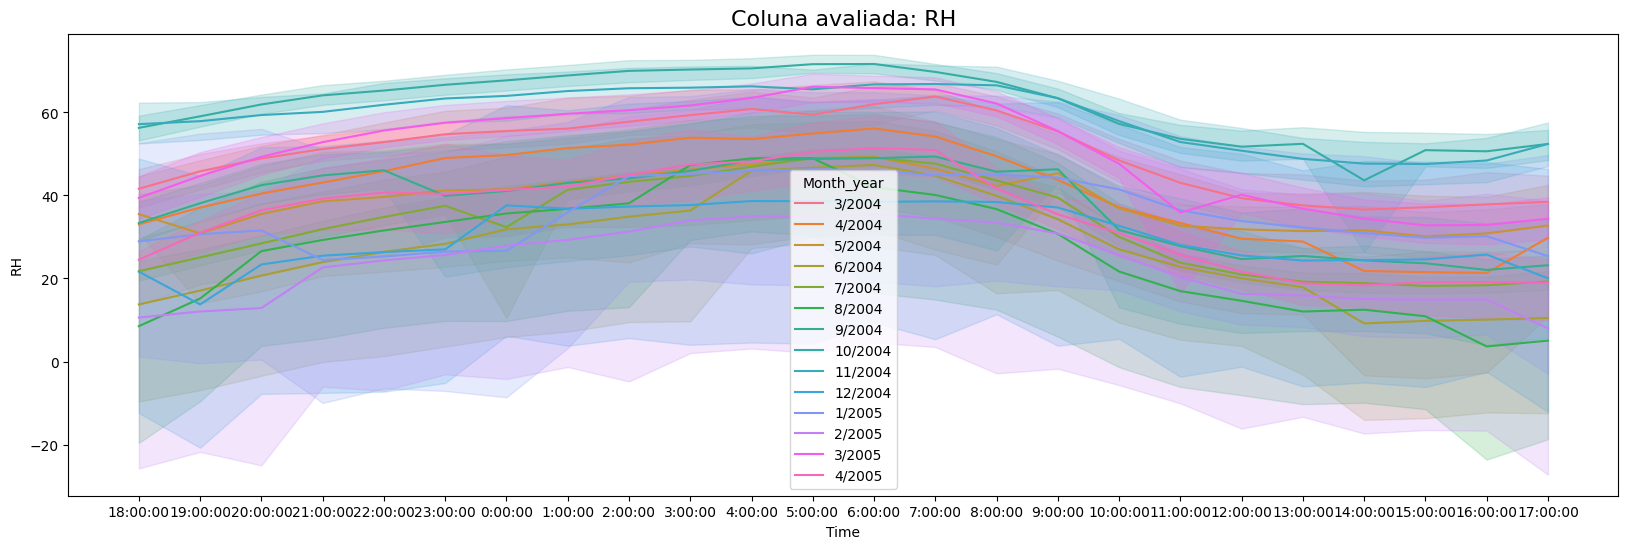

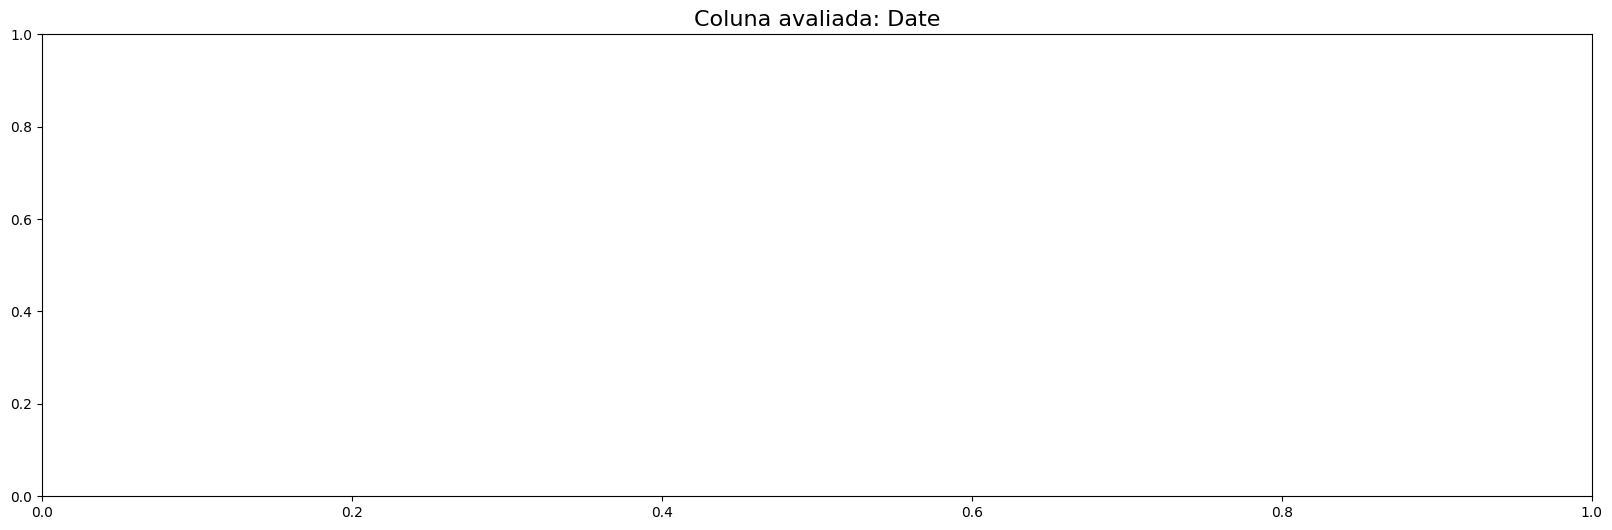

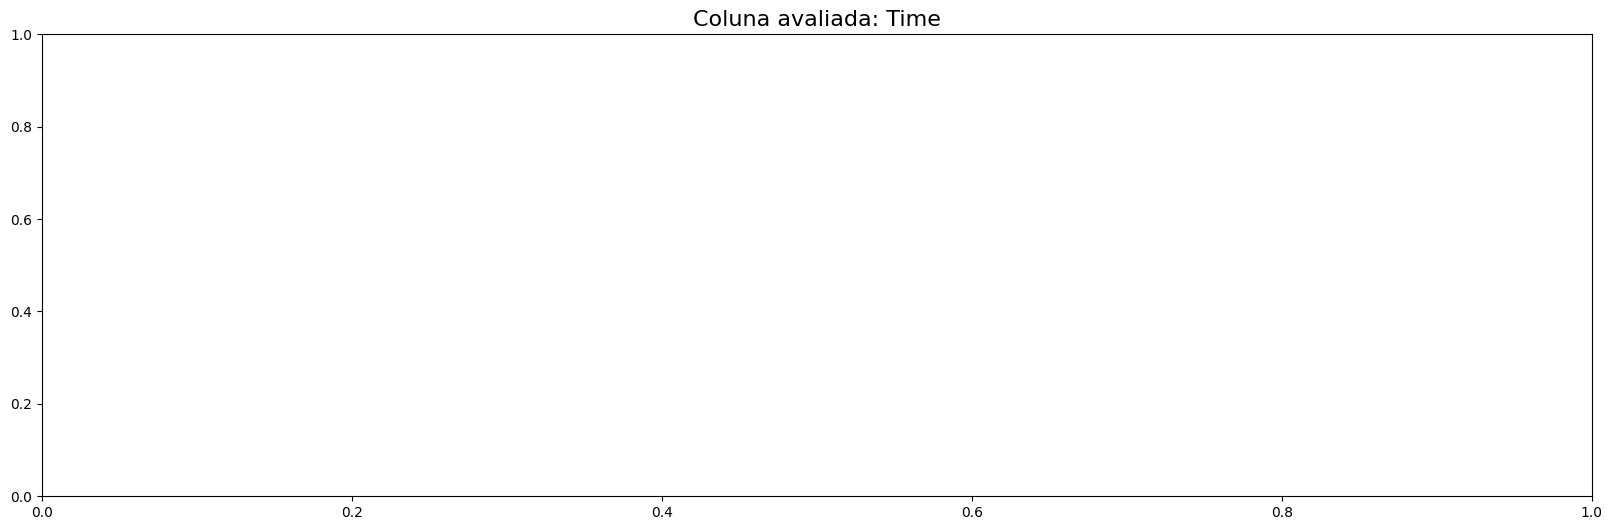

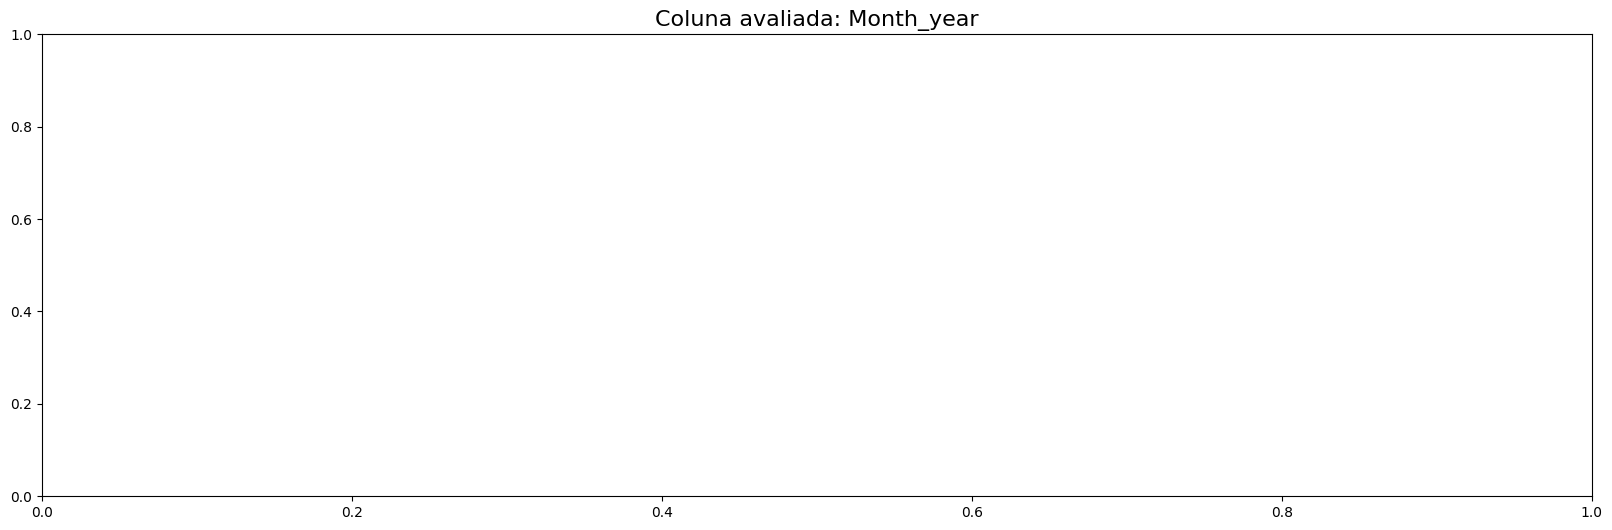

In [69]:
for c in X.columns:
    plt.figure(figsize=(20, 6))
    plt.title(f"Coluna avaliada: {c}", fontsize=16)
    
    if c in numericas:
        sns.lineplot(data=X, x="Time", y=c, hue="Month_year")
    
    plt.show()


Aparentemente é um "outlier" normal, logo que para as variáveis em que ocorre, ocorrem para todos os meses em um mesmo horario.

## 7. Desenvolvendo um modelo

In [30]:
y = X['AH']

In [32]:
y.head()

0    0.7578
1    0.7255
2    0.7502
3    0.7867
4    0.7888
Name: AH, dtype: float64

In [33]:
X = X.drop(columns = ['day','month','year', 'AH' ])

In [34]:
X

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18:00:00     2.6         1360       150      11.9   
1    2004-03-10  19:00:00     2.0         1292       112       9.4   
2    2004-03-10  20:00:00     2.2         1402        88       9.0   
3    2004-03-10  21:00:00     2.2         1376        80       9.2   
4    2004-03-10  22:00:00     1.6         1272        51       6.5   
...         ...       ...     ...          ...       ...       ...   
9352 2005-04-04  10:00:00     3.1         1314      -200      13.5   
9353 2005-04-04  11:00:00     2.4         1163      -200      11.4   
9354 2005-04-04  12:00:00     2.4         1142      -200      12.4   
9355 2005-04-04  13:00:00     2.1         1003      -200       9.5   
9356 2005-04-04  14:00:00     2.2         1071      -200      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056      113          1692   
1               955      103          1174       92          1559   
2               939      131          1140      114          1555   
3               948      172          1092      122          1584   
4               836      131          1205      116          1490   
...             ...      ...           ...      ...           ...   
9352           1101      472           539      190          1374   
9353           1027      353           604      179          1264   
9354           1063      293           603      175          1241   
9355            961      235           702      156          1041   
9356           1047      265           654      168          1129   

      PT08.S5(O3)     T    RH Month_year  
0            1268  13.6  48.9     3/2004  
1             972  13.3  47.7     3/2004  
2            1074  11.9  54.0     3/2004  
3            1203  11.0  60.0     3/2004  
4            1110  11.2  59.6     3/2004  
...           ...   ...   ...        ...  
9352         1729  21.9  29.3     4/2005  
9353         1269  24.3  23.7     4/2005  
9354         1092  26.9  18.3     4/2005  
9355          770  28.3  13.5     4/2005  
9356          816  28.5  13.1     4/2005  

[9357 rows x 15 columns]

In [35]:
categorical_columns = X.select_dtypes(exclude='number').columns.to_list()
numerical_columns = X.select_dtypes (include='number').columns.to_list()

In [36]:
X[categorical_columns].head()

Date      Time Month_year
0 2004-03-10  18:00:00     3/2004
1 2004-03-10  19:00:00     3/2004
2 2004-03-10  20:00:00     3/2004
3 2004-03-10  21:00:00     3/2004
4 2004-03-10  22:00:00     3/2004

In [37]:
X[numerical_columns].head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6         1360       150      11.9           1046      166   
1     2.0         1292       112       9.4            955      103   
2     2.2         1402        88       9.0            939      131   
3     2.2         1376        80       9.2            948      172   
4     1.6         1272        51       6.5            836      131   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  
0          1056      113          1692         1268  13.6  48.9  
1          1174       92          1559          972  13.3  47.7  
2          1140      114          1555         1074  11.9  54.0  
3          1092      122          1584         1203  11.0  60.0  
4          1205      116          1490         1110  11.2  59.6

In [39]:
X = X[numerical_columns+categorical_columns]
y = y

In [40]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6549, 15)
X_test shape: (2808, 15)
y_train shape: (6549,)
y_test shape: (2808,)


In [54]:
models_list = [
    lgb.LGBMRegressor(),
    LinearRegression(),
    linear_model.Lasso(alpha=0.1),
    GradientBoostingRegressor(random_state=0),
    KNeighborsRegressor(n_neighbors=2),
    MLPRegressor(random_state=1, max_iter=500),
    DecisionTreeRegressor(random_state=0)
  ]



for model in models_list:
    numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder())
    ])


    preprocessor = ColumnTransformer(transformers =[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
    ])


    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection',SelectKBest(score_func = f_regression, k=10)),
    ('model', model)
    ])

    pipeline.fit(X_train, y_train)



In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


results = []

for model in models_list:

    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection',SelectKBest(score_func = f_regression, k=10)),
    ('model', model)
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict (X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)


    results.append({
        "Model": model.__class__.__name__,
        "MSE": mse,
        "MAE": mae,
        "rmse": rmse,
        "r2": r2
    })

result = pd.DataFrame(results)

result


Model       MSE       MAE      rmse        r2
0              LGBMRegressor  0.000322  0.012769  0.017943  1.000000
1           LinearRegression  1.319250  0.820970  1.148586  0.999133
2                      Lasso  1.782753  1.006003  1.335198  0.998828
3  GradientBoostingRegressor  0.002863  0.039512  0.053509  0.999998
4        KNeighborsRegressor  0.012272  0.074163  0.110778  0.999992
5               MLPRegressor  0.010167  0.072181  0.100834  0.999993
6      DecisionTreeRegressor  0.000813  0.019151  0.028509  0.999999

O modelo que melhor se comportou nos testes realizados foi o LGBMRegressor, por conseguinte do DecisionTreeRegressor.

<module 'matplotlib.pyplot' from 'C:\\Users\\Elaine\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


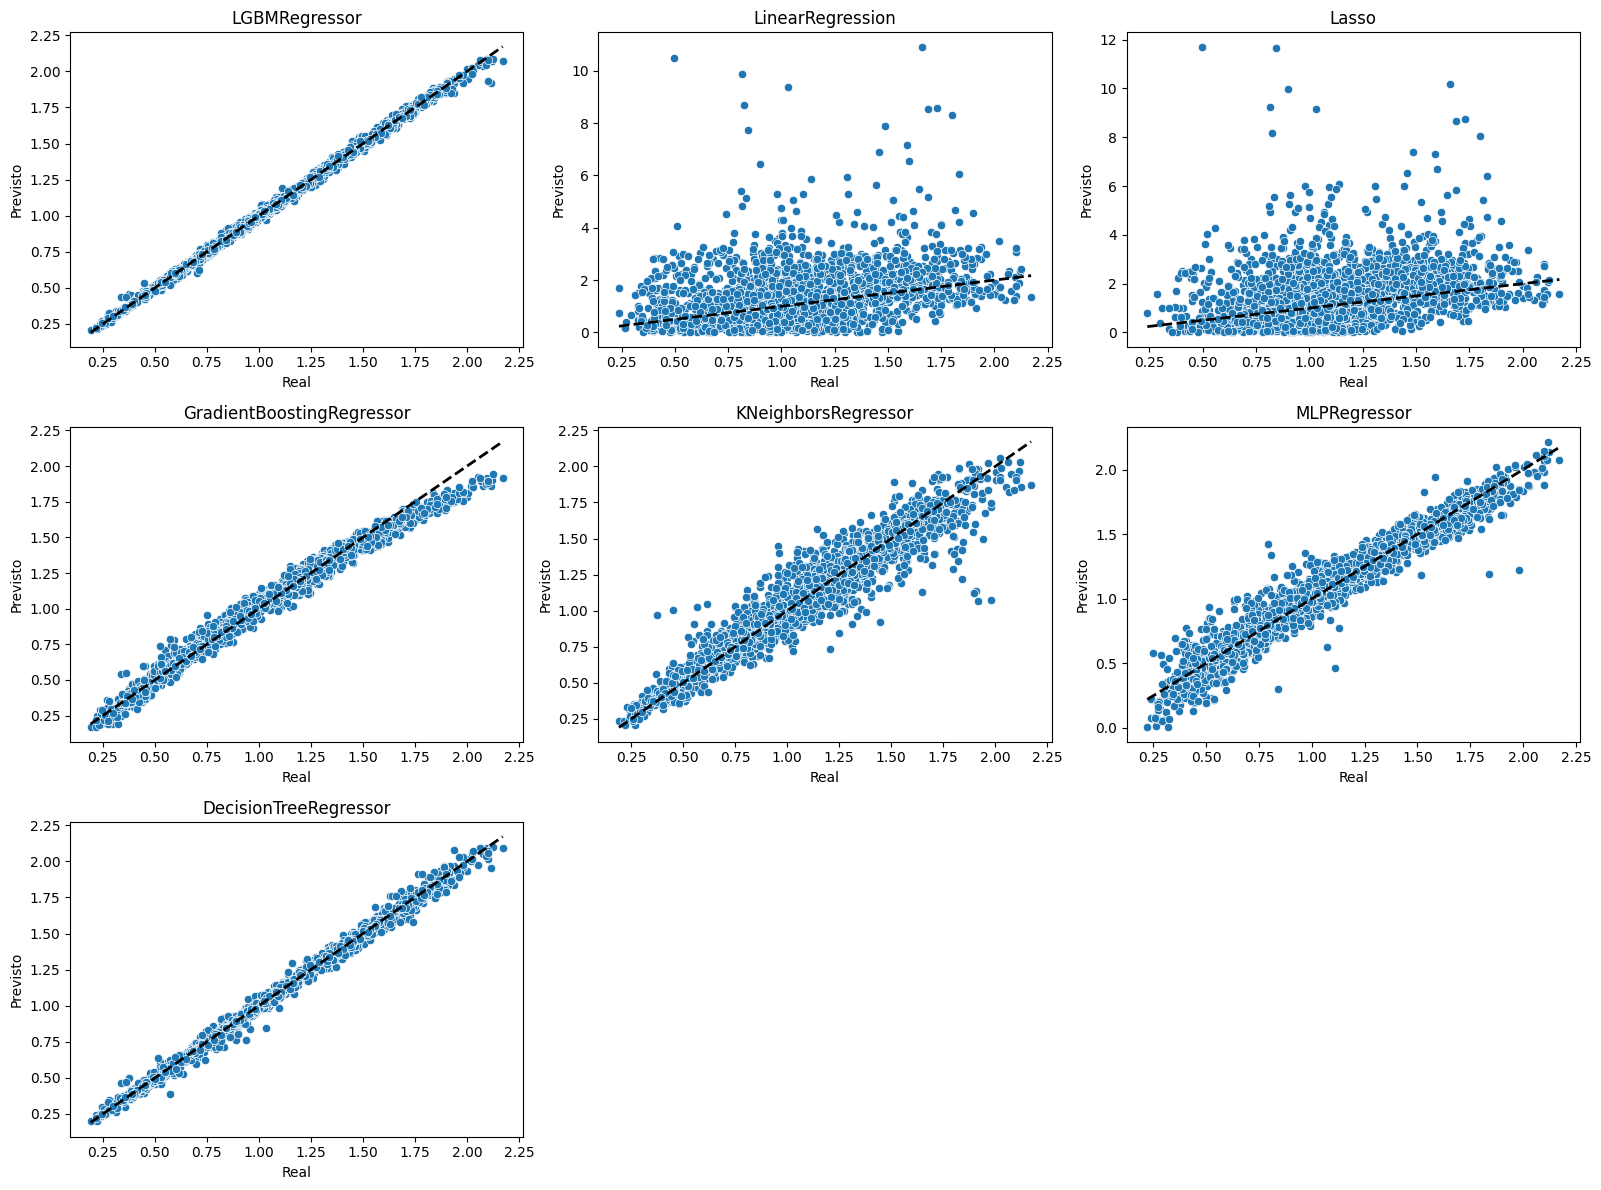

In [46]:

plt.figure(figsize=(16, 12))


for i, model in enumerate(models_list):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=f_regression, k=10)),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mask = (y_test > 0) & (y_pred > 0)
    y_test_filtered = y_test[mask]
    y_pred_filtered = y_pred[mask]


    plt.subplot(3, 3, i+1)
    sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time")
    sns.scatterplot(x=y_test_filtered, y=y_pred_filtered)
    plt.plot([y_test_filtered.min(), y_test_filtered.max()], [y_test_filtered.min(), y_test_filtered.max()], 'k--', lw=2)

    plt.title(f"{model.__class__.__name__}")


    plt.xlabel('Real')
    plt.ylabel('Previsto')


plt.tight_layout()
print(plt)


Foi retirado o "outlier" para melhor visualização dos modelos. Por meio das plotagens verificamos visualmente que os modelos LGMRegressor e DecisionTreeRegressor se comportaram melhor que todos os outros testados.